----------------------------------------------------------------------------------------------------------------------

**Name:** Qingyue(Sue) Su

**E-mail:** qingyuesu@brandeis.edu

**Date:** 2019-12-05

<h1 align="center"><font size="5"> Instacart Customer Behavior Analysis and Recommender Design</font></h1>

# <center>Instacart Customer Behavior Analysis and Recommender Design</center>

<img src="assets/logo.png" width="20%">

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a id="#Part0">Import packages and data</a></li>
        <li><a id="#Part1">Part 1. Explore the data frame and data relationship</a></li>
            <ul>
                <li><a id="#Part1_1">1. Explore the data frame of each table</a></li>
                <li><a id="#Part1_2">2. Draw an E-R diagram</a></li>
            </ul>
        <li><a id="#Part2">Part 2. Explanatory data analysis (EDA) of customer data</a></li>   
            <ul>
                <li><a id="#Part2_1">1. Modules</a></li>
            </ul>
    </ul>
</div>
<br>
<hr>

Import required packages:

In [1]:
#!pip install squarify
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from  matplotlib import cm
import matplotlib as mpl
import numpy as np
import squarify
from sklearn.metrics.pairwise import cosine_similarity
#% matplotlib inline
plt.style.use('ggplot')

Import data:

In [2]:
path = os.path.join(os.getcwd(),"data")
table_name = []
table_dic = {}

for file in os.listdir(path):  
    filename = file.split('.')[0]
    table_name.append(filename)
    table_dic[filename] = pd.read_csv(os.path.join(path, file))

print(table_name)
print(table_dic.keys())

['products', 'orders', 'order_products__train', 'departments', 'aisles', 'order_products__prior']
dict_keys(['products', 'orders', 'order_products__train', 'departments', 'aisles', 'order_products__prior'])


In [3]:
Products = table_dic['products']
Orders = table_dic['orders']
Departments = table_dic['departments']
Aisles = table_dic['aisles']
Order_products_train = table_dic['order_products__train']
Order_products_prior = table_dic['order_products__prior']

<h2 id="#Part1">Part 1. Explore the data frame and data relationship</h2>
<hr>

<h3 id="#Part1_1">1. Explore the data frame of each table</h3>

#### (1) Products

49K+ rows
* **product_id:** product identifier (Primary Key)
* **product_name:** name of the product
* **aisle_id:** aisle identifier (Foreign Key)
* **department_id:** department identifier (Foreign Key)

In [4]:
Products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
# Explore the primary key of this table

print(len(Products))
p = set(Products["product_id"])
print(len(p))

49688
49688


#### (2) Orders

3M+ rows
* **order_id:** order identifier (Primary Key)
* **user_id:** user/customer identifier (Foreign Key)
* **eval_set:** which evaluation set this order belongs in (see SET described below)
* **order_number:** the order sequence number for this user (1 = first, n = nth)
* **order_dow:** the day of the week the order was placed on
* **order_hour_of_day:** the hour of the day the order was placed on
* **days_since_prior:** days since the last order, capped at 30 (with NAs for order_number = 1)

In [6]:
Orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
# Explore the primary key of this table

print(len(Orders))
p = set(Orders["order_id"])
print(len(p))

3421083
3421083


#### (3) Departments

21 rows
* **department_id:** department identifier (Primary Key)
* **department:** the name of the department

In [8]:
Departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
# Explore the primary key of this table

print(len(Departments))
p = set(Departments["department_id"])
print(len(p))

21
21


#### (4) Aisles

134 rows
* **aisle_id:** aisle identifier
* **aisle:** the name of the aisle

In [10]:
Aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [11]:
# Explore the primary key of this table

print(len(Aisles))
p = set(Aisles["aisle_id"])
print(len(p))

134
134


#### (5) Order_products_train

1M+ rows
* **order_id:** Order identifier (Primary Key 1, Foreign Key 1)
* **product_id:** Product identifier (Primary Key 1, Foreign Key 1)
* **add_to_cart_order:** Order in which each product was added to cart
* **reordered:** 1 if this product has been ordered by this user in the past, 0 otherwise

In [12]:
Order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [13]:
# Explore the primary key of this table

print(len(Order_products_train))
p = Order_products_train[["order_id","product_id"]]
p_new = p.drop_duplicates()
print(len(p_new))

1384617
1384617


#### (6) Order_products_prior

32M+ rows
* **order_id:** Order identifier (Primary Key 1, Foreign Key 1)
* **product_id:** Product identifier (Primary Key 1, Foreign Key 1)
* **add_to_cart_order:** Order in which each product was added to cart
* **reordered:** 1 if this product has been ordered by this user in the past, 0 otherwise

In [14]:
Order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [15]:
# Explore the primary key of this table

print(len(Order_products_prior))
p = Order_products_prior[["order_id","product_id"]]
p_new = p.drop_duplicates()
print(len(p_new))

32434489
32434489


<h3 id="#Part1_2">2. Draw an E-R diagram</h3>

<img src="assets/ER_Diagram.png" width="90%">

<h2 id="#Part2">Part 2. Explanatory data analysis (EDA) of customer data</h2>
<hr>

* How many orders the dataset has? How to divide the train and test orders?
* How many unique users we have? How to divide the train and test users?
* How often do the customers purchase?
* When do they like to purchase?
* How many items do they purchase in each order?
* And more questions.

<h3 id="#Part2_1">1. How many orders the dataset has? How to divide the train and test orders?</h3>

**order_id**: order identifier

In [18]:
p = set(Orders["order_id"]) 
print(len(p))

3421083


**eval_set**: which evaluation set this order belongs in (see SET described below)

In [19]:
p = set(Orders["eval_set"])
print(p)

{'train', 'test', 'prior'}


* **prior**: orders prior to that users most recent order (~3.2m orders)
* **train**: training data supplied to participants (~131k orders)
* **test**: test data reserved for machine learning competitions (~75k orders)

In [16]:
Orders.groupby(["eval_set"])[['order_id']].nunique()
# Orders['order_id'].groupby(Orders["eval_set"]).count()

,order_id
eval_set,
prior,3214874
test,75000
train,131209


**Outcome:**
* there are 3,421,083 orders in total.
* there are 3,214,874 orders that are prior.
* there are 131,209 orders that are in train set.
* there are 75,000 orders that are in test set.

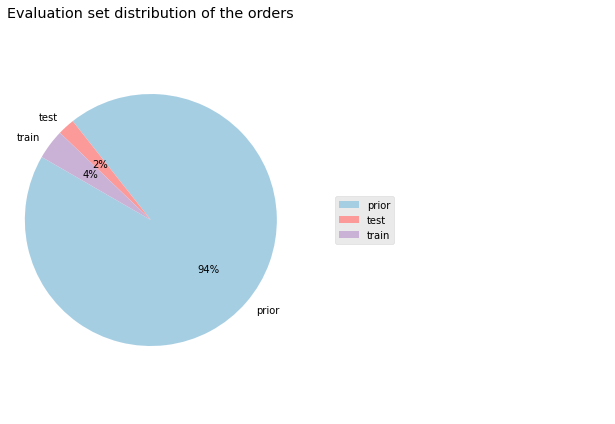

In [17]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['prior', 'test', 'train']
sizes = [3214874, 75000, 131209]
explode = (0, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, axes = plt.subplots(figsize=(9,6),ncols=2) # Set the graph location and size
ax1, ax2 = axes.ravel()

colors = cm.Paired(np.arange(len(sizes))/len(sizes)) # colormaps: Paired, autumn, rainbow, gray,spring,Darks
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.0f%%',
        shadow=False, startangle=150, colors=colors)

ax1.axis('equal')  

# Set the size of characters
proptease = fm.FontProperties()
proptease.set_size('medium')
# font size include: ‘xx-small’,x-small’,'small’,'medium’,‘large’,‘x-large’,‘xx-large’ or number, e.g. '12'
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

ax1.set_title('Evaluation set distribution of the orders', loc='center')

# ax2 only shows the legend
ax2.axis('off')
ax2.legend(patches, labels, loc='center left')

plt.tight_layout()
#plt.savefig('Demo_project_set_legend_good.jpg')
plt.show()

<h3 id="#Part2_2">2. How many unique users we have? How to divide the train and test users?</h3>

**user_id**: customer identifier

In [19]:
p = set(Orders["user_id"]) 
print(len(p))

206209


In [20]:
Orders.groupby(["eval_set"])[['user_id']].nunique()
#Orders['order_id'].groupby(Orders["eval_set"]).count()

,user_id
eval_set,
prior,206209
test,75000
train,131209


**Outcome:**
* there are 206209 unique customer in total.
* there are 131209 customers in the train set.
* there are 75000 customers in the test set.

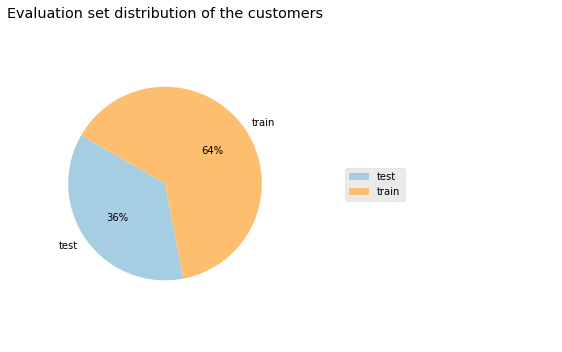

In [21]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['test', 'train']
sizes = [75000, 131209]
explode = (0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, axes = plt.subplots(figsize=(8,5),ncols=2) # Set the graph location and size
ax1, ax2 = axes.ravel()

colors = cm.Paired(np.arange(len(sizes))/len(sizes)) # colormaps: Paired, autumn, rainbow, gray,spring,Darks
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.0f%%',
        shadow=False, startangle=150, colors=colors)

ax1.axis('equal')  

# Set the size of characters
proptease = fm.FontProperties()
proptease.set_size('medium')
# font size include: ‘xx-small’,x-small’,'small’,'medium’,‘large’,‘x-large’,‘xx-large’ or number, e.g. '12'
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

ax1.set_title('Evaluation set distribution of the customers', loc='center')

# ax2 only shows the legend
ax2.axis('off')
ax2.legend(patches, labels, loc='center left')

plt.tight_layout()
#plt.savefig('Demo_project_set_legend_good.jpg')
plt.show()

<h3 id="#Part2_3">3. How often do the customers purchase?</h3>

In [22]:
# Step1: Calculate the total amount of orders per user

order_per_user = Orders.groupby(["user_id"])[['order_number']].nunique()

order_per_user_new = pd.DataFrame(order_per_user) # transfer to the dataframe
order_per_user_new.reset_index(inplace=True)

# Step2: Calculate the total users buying the same total orders

total_order_user = order_per_user_new.groupby(["order_number"])[['user_id']].nunique()

total_order_user_new = pd.DataFrame(total_order_user) # transfer to the dataframe
total_order_user_new.reset_index(inplace=True)

# Step3: Sort the values

total_order_user_new2 = total_order_user_new.sort_values(by=['order_number'],ascending=True,na_position='first')
total_order_user_new2

,order_number,user_id
0,4,23986
1,5,19590
2,6,16165
3,7,13850
4,8,11700
...,...,...
92,96,67
93,97,54
94,98,50
95,99,47


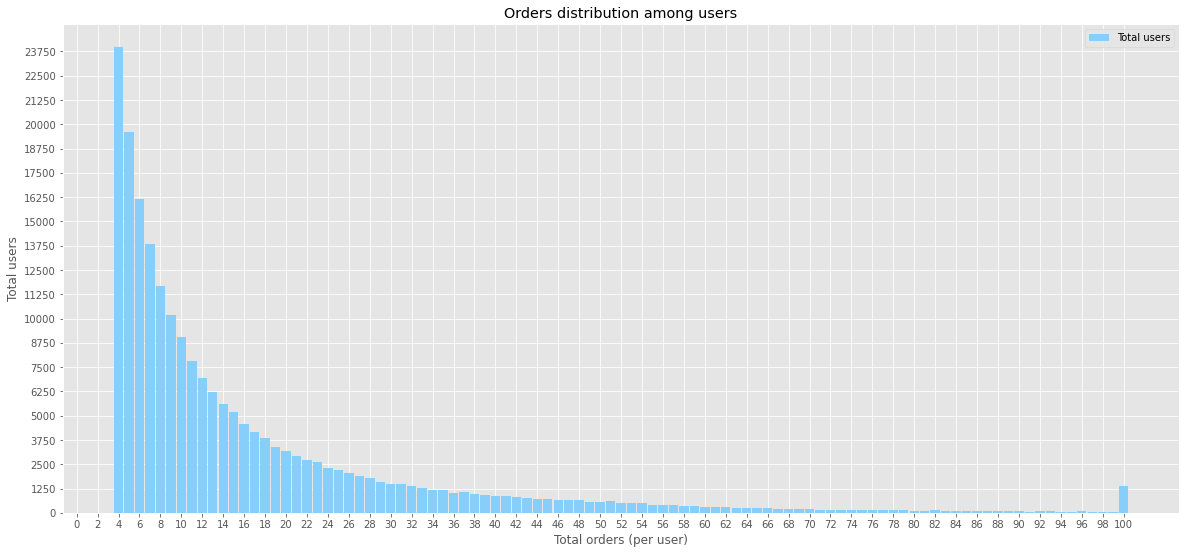

In [23]:
plt.figure(figsize=(20, 9))
plt.subplot(1, 1, 1)

#N = 97
values = total_order_user_new2["user_id"]
index = total_order_user_new2["order_number"]

width = 0.9

p2 = plt.bar(index, values, width, label="Total users", color="#87CEFA")

plt.xlabel('Total orders (per user)')
plt.ylabel('Total users')

plt.title('Orders distribution among users')

plt.xticks(np.arange(0, 102, 2))
plt.yticks(np.arange(0, 25000, 1250))

plt.legend(loc="upper right")
plt.show()

The amount of orders for each customers are between 4 to 100. 

Majority of people had purchased 4 to 10 times.

<h3 id="#Part2_4">4. How often do the customers purchase?</h3>

**order_number**: the order sequence number for this user (1 = first, n = nth)

In [25]:
p = set(Orders["order_number"])  
print(len(p))

100


**order_dow**: the day of the week the order was placed on

In [26]:
p = set(Orders["order_dow"])
print(p)

{0, 1, 2, 3, 4, 5, 6}


In [27]:
order_per_weekday = Orders.groupby(["order_dow"])[['order_id']].nunique()
order_per_weekday

order_per_weekday_new = pd.DataFrame(order_per_weekday) # transfer to the dataframe
order_per_weekday_new.reset_index(inplace=True)
order_per_weekday_new

,order_dow,order_id
0,0,600905
1,1,587478
2,2,467260
3,3,436972
4,4,426339
5,5,453368
6,6,448761


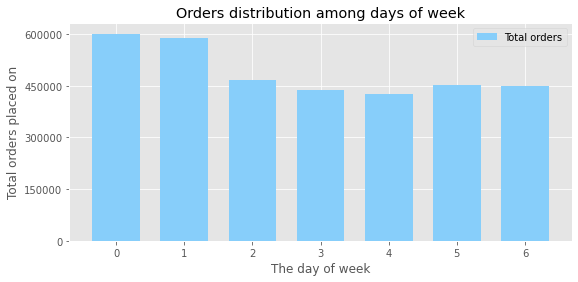

In [28]:
plt.figure(figsize=(9, 4))

plt.subplot(1, 1, 1)

#N = 7
values = order_per_weekday_new["order_id"]
index = order_per_weekday_new["order_dow"]

width = 0.7

p2 = plt.bar(index, values, width, label="Total orders", color="#87CEFA")

plt.xlabel('The day of week')
plt.ylabel('Total orders placed on')

plt.title('Orders distribution among days of week')

plt.xticks(np.arange(0, 7, 1))
plt.yticks(np.arange(0, 740000, 150000))

plt.legend(loc="upper right")

plt.show()

0 (Sun) and 1 (Mon) has the most orders in a week, while 4 (Thur) has the least orders.

<h3 id="#Part2_5">5. How often do the customers purchase?</h3>

**order_hour_of_day**: the hour of the day the order was placed on

In [37]:
p = set(Orders["order_hour_of_day"])
print(p)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}


In [38]:
# What time of day do people purchase?

Order_per_hour_of_day = Orders.groupby(["order_hour_of_day"])[['order_id']].nunique()
Order_per_hour_of_day


Order_per_hour_of_day_new = pd.DataFrame(Order_per_hour_of_day) # transfer to the dataframe
Order_per_hour_of_day_new.reset_index(inplace=True)
Order_per_hour_of_day_new.head()

,order_hour_of_day,order_id
0,0,22758
1,1,12398
2,2,7539
3,3,5474
4,4,5527


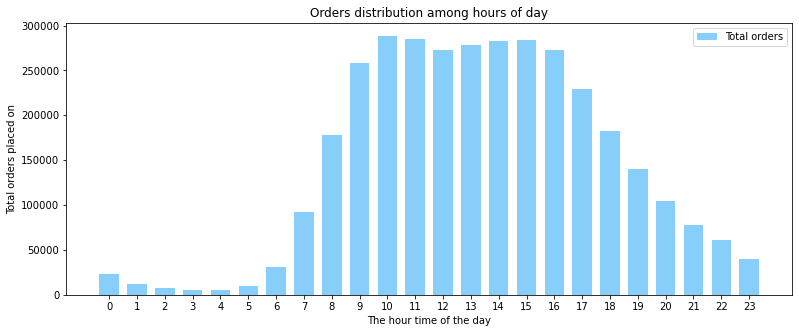

In [39]:
# In which day of week they like to purchase the most?
plt.figure(figsize=(13, 5))

# 再创建一个规格为 1 x 1 的子图
plt.subplot(1, 1, 1)

# 柱子总数
N = 7
# 包含每个柱子对应值的序列
values = Order_per_hour_of_day_new["order_id"]

# 包含每个柱子下标的序列
index = Order_per_hour_of_day_new["order_hour_of_day"]

# 柱子的宽度
width = 0.7

# 绘制柱状图, 每根柱子的颜色为紫罗兰色
p2 = plt.bar(index, values, width, label="Total orders", color="#87CEFA")

# 设置横轴标签
plt.xlabel('The hour time of the day')
# 设置纵轴标签
plt.ylabel('Total orders placed on')

# 添加标题
plt.title('Orders distribution among hours of day')

# 添加纵横轴的刻度
plt.xticks(np.arange(0, 24, 1))
#plt.yticks(np.arange(0, 740000, 150000))

# 添加图例
plt.legend(loc="upper right")

plt.show()

Looks like people like to order between 8am to 6pm.

**days_since_prior_order**: days since the last order, capped at 30 (with NAs for order_number = 1)

In [40]:
Orders["days_since_prior_order"].max()

30.0

In [41]:
Orders["days_since_prior_order"].min()

0.0

In [42]:
# p = set(Orders["days_since_prior_order"])
# 会出来很多东西，因为每一个nan都不一样，不能只算做一个

In [43]:
#Orders[["days_since_prior_order","order_id"]]
# 原来是3421083行
prior_order_new = Orders[["days_since_prior_order","order_id"]].dropna()
prior_order_new["days_since_prior_order"]=prior_order_new["days_since_prior_order"].astype(int) # day改成integer
prior_order_new

,days_since_prior_order,order_id
1,15,2398795
2,21,473747
3,29,2254736
4,28,431534
5,19,3367565
...,...,...
3421078,29,2266710
3421079,30,1854736
3421080,18,626363
3421081,7,2977660


In [44]:
# How often do people purchase?

Order_per_days_since_prior = prior_order_new.groupby(["days_since_prior_order"])[['order_id']].nunique()
Order_per_days_since_prior


Order_per_days_since_prior_new = pd.DataFrame(Order_per_days_since_prior) # transfer to the dataframe
Order_per_days_since_prior_new.reset_index(inplace=True)
Order_per_days_since_prior_new.head()

,days_since_prior_order,order_id
0,0,67755
1,1,145247
2,2,193206
3,3,217005
4,4,221696


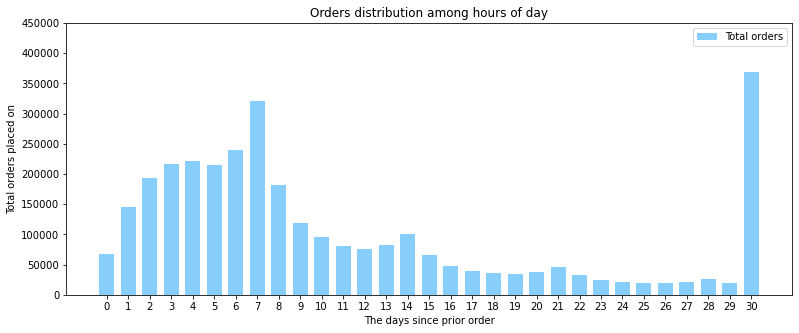

In [45]:
# In which day of week they like to purchase the most?
plt.figure(figsize=(13, 5))

# 再创建一个规格为 1 x 1 的子图
plt.subplot(1, 1, 1)

# 柱子总数
N = 7
# 包含每个柱子对应值的序列
values = Order_per_days_since_prior_new["order_id"]

# 包含每个柱子下标的序列
index = Order_per_days_since_prior_new["days_since_prior_order"]

# 柱子的宽度
width = 0.7

# 绘制柱状图, 每根柱子的颜色为紫罗兰色
p2 = plt.bar(index, values, width, label="Total orders", color="#87CEFA")

# 设置横轴标签
plt.xlabel('The days since prior order')
# 设置纵轴标签
plt.ylabel('Total orders placed on')

# 添加标题
plt.title('Orders distribution among hours of day')

# 添加纵横轴的刻度
plt.xticks(np.arange(0, 31, 1))
plt.yticks(np.arange(0, 480000, 50000))

# 添加图例
plt.legend(loc="upper right")

plt.show()

* Looks like majority people order once a week, between 0 to 7.
* And there are people who order once more than 30 days.

In [46]:
# How many items do people purchase in an order?

#这里item就是下面这个product的含义，这里先是看order里一般都几个item；之后还会看一个user里有几个item

# Concatenation of both tables.
Order_products = pd.concat([Order_products_prior, Order_products_train]) 
Order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


<img src="assets/Concat_1.png" width="90%">

In [47]:
Products_per_order = Order_products.groupby(["order_id"])[['product_id']].nunique()
#Products_per_order.head()
Products_per_order_new = pd.DataFrame(Products_per_order) # transfer to the dataframe
Products_per_order_new.reset_index(inplace=True)
Products_per_order_new.head()

,order_id,product_id
0,1,8
1,2,9
2,3,8
3,4,13
4,5,26


In [48]:
#Products_per_order_new
Sum_order_per_sum_products = Products_per_order_new.groupby(["product_id"])[['order_id']].nunique()
#Products_per_order.head()
Sum_order_per_sum_products_new = pd.DataFrame(Sum_order_per_sum_products) # transfer to the dataframe
Sum_order_per_sum_products_new.reset_index(inplace=True)
Sum_order_per_sum_products_new.head()

,product_id,order_id
0,1,163593
1,2,194361
2,3,215060
3,4,230299
4,5,237225


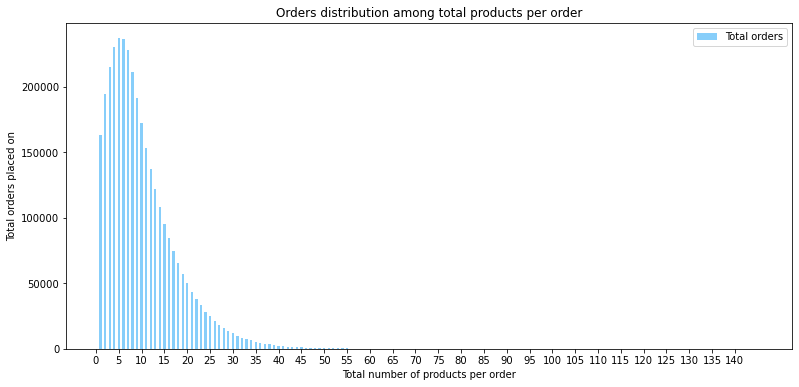

In [49]:
# In which day of week they like to purchase the most?
plt.figure(figsize=(13, 6))

# 再创建一个规格为 1 x 1 的子图
plt.subplot(1, 1, 1)

# 柱子总数
#N = 7
# 包含每个柱子对应值的序列
values = Sum_order_per_sum_products_new["order_id"]

# 包含每个柱子下标的序列
index = Sum_order_per_sum_products_new["product_id"]

# 柱子的宽度
width = 0.5

# 绘制柱状图, 每根柱子的颜色为紫罗兰色
p2 = plt.bar(index, values, width, label="Total orders", color="#87CEFA")

# 设置横轴标签
plt.xlabel('Total number of products per order')
# 设置纵轴标签
plt.ylabel('Total orders placed on')

# 添加标题
plt.title('Orders distribution among total products per order')

# 添加纵横轴的刻度
plt.xticks(np.arange(0, 141, 5))
#plt.yticks(np.arange(0, 480000, 50000))

# 添加图例
plt.legend(loc="upper right")

plt.show()

* People mostly purchase 4 items per order.
* Majority of people like to purchase between 3 to 8 items per order.

In [50]:
# How many transaction and unique products is in this dataset?
Order_products.shape[0]

33819106

In [51]:
print(len(Order_products.order_id.unique()))
print(len(Order_products.product_id.unique()))

3346083
49685


<img src="assets/ER_Diagram.png" width="90%">

下面就是一些merge table的操作了

In [52]:
# Merging tables together.

# Step 1
Products_Departments = pd.merge(Products, Departments, how='left', on=['department_id', 'department_id'])
Products_Departments.head()

,product_id,product_name,aisle_id,department_id,department
0,1,Chocolate Sandwich Cookies,61,19,snacks
1,2,All-Seasons Salt,104,13,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen
4,5,Green Chile Anytime Sauce,5,13,pantry


<img src="assets/Leftjoin_1.png" width="30%">

In [53]:
# Step 2
Products_Departments_Aisles = pd.merge(Products_Departments, Aisles, how='left', on=['aisle_id', 'aisle_id'])
Products_Departments_Aisles.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


<img src="assets/Leftjoin_2.png" width="30%">

How many items is in each product category and what is the top ten product category in terms of having the most items?

In [56]:
Sum_product_per_department = Products_Departments_Aisles.groupby(["department"])[['product_id']].nunique()
#Products_per_order.head()
Sum_product_per_department_new = pd.DataFrame(Sum_product_per_department) # transfer to the dataframe
Sum_product_per_department_new.reset_index(inplace=True)
Sum_product_per_department_new_2= Sum_product_per_department_new.sort_values(by='product_id', ascending=False)
Sum_product_per_department_new_2.head()

,department,product_id
17,personal care,6563
20,snacks,6264
16,pantry,5371
3,beverages,4365
10,frozen,4007


In [57]:
len(Sum_product_per_department_new_2)

21

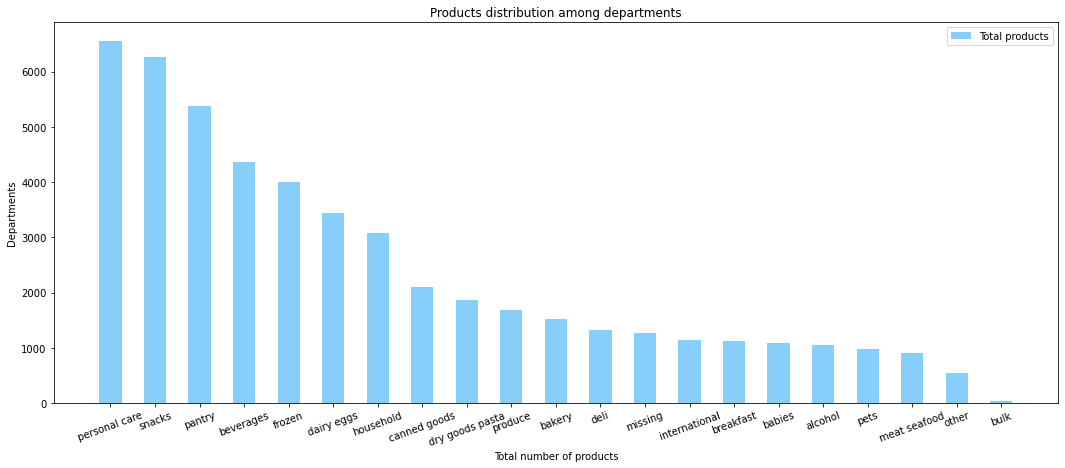

In [82]:
# In which day of week they like to purchase the most?
plt.figure(figsize=(18, 7))

# 再创建一个规格为 1 x 1 的子图
plt.subplot(1, 1, 1)

# 柱子总数
#N = 7
# 包含每个柱子对应值的序列
values = Sum_product_per_department_new_2["product_id"]

# 包含每个柱子下标的序列
index = Sum_product_per_department_new_2["department"]

# 柱子的宽度
width = 0.5

# 绘制柱状图, 每根柱子的颜色为紫罗兰色
p2 = plt.bar(index, values, width, label="Total products", color="#87CEFA")

# 设置横轴标签
plt.xlabel('Total number of products')
# 设置纵轴标签
plt.ylabel('Departments')

# 添加标题
plt.title('Products distribution among departments')

# 添加纵横轴的刻度
plt.xticks(rotation=20)
#plt.yticks(np.arange(0, 480000, 50000))

# 添加图例
plt.legend(loc="upper right")

plt.show()

<img src="assets/ER_Diagram.png" width="90%">

In [64]:
# What are the items that people purchase the most？

# 一共有21个department，在每个department里销量最好的是什么？

# Merging Products_Departments_Aisles and Order_products.

Order_Products_Departments_Aisles = pd.merge(Order_products, Products_Departments_Aisles, how='left', on=['product_id', 'product_id'])
Order_Products_Departments_Aisles.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,pantry,baking ingredients


<img src="assets/Leftjoin_3.png" width="30%">

In [74]:
# Find out the top 15 items people purchased the most.

Sum_order_per_product_name = Order_Products_Departments_Aisles.groupby(["product_name"])[['order_id']].count()

Sum_order_per_product_name_new = pd.DataFrame(Sum_order_per_product_name) # transfer to the dataframe
Sum_order_per_product_name_new.reset_index(inplace=True)
Sum_order_per_product_name_new_2= Sum_order_per_product_name_new.sort_values(by='order_id', ascending=False)

Sum_order_per_product_name_new_2.columns = ['product_name', 'total_order_number']
Sum_order_per_product_name_new_2.head(10)

,product_name,total_order_number
3677,Banana,491291
3472,Bag of Organic Bananas,394930
31923,Organic Strawberries,275577
28843,Organic Baby Spinach,251705
30300,Organic Hass Avocado,220877
28807,Organic Avocado,184224
22415,Large Lemon,160792
42908,Strawberries,149445
23422,Limes,146660
32481,Organic Whole Milk,142813


* The top 15 items that people purchase the most are above.
* Most of them are organic fruits/veggies. All of them are fruits/veggies.

In [73]:
# Finding top 15 aisles. 

Sum_order_per_aisle = Order_Products_Departments_Aisles.groupby(["aisle"])[['order_id']].count()

Sum_order_per_aisle_new = pd.DataFrame(Sum_order_per_aisle) # transfer to the dataframe
Sum_order_per_aisle_new.reset_index(inplace=True)
Sum_order_per_aisle_new_2= Sum_order_per_aisle_new.sort_values(by='order_id', ascending=False)

Sum_order_per_aisle_new_2.columns = ['aisle', 'total_order_number']
Sum_order_per_aisle_new_2.head(10)

,aisle,total_order_number
50,fresh fruits,3792661
53,fresh vegetables,3568630
98,packaged vegetables fruits,1843806
133,yogurt,1507583
93,packaged cheese,1021462
83,milk,923659
131,water seltzer sparkling water,878150
25,chips pretzels,753739
119,soy lactosefree,664493
11,bread,608469


In [75]:
# Finding top 15 departments.
Sum_order_per_department = Order_Products_Departments_Aisles.groupby(["department"])[['order_id']].count()

Sum_order_per_department_new = pd.DataFrame(Sum_order_per_department) # transfer to the dataframe
Sum_order_per_department_new.reset_index(inplace=True)
Sum_order_per_department_new_2= Sum_order_per_department_new.sort_values(by='order_id', ascending=False)

Sum_order_per_department_new_2.columns = ['aisle', 'total_order_number']
Sum_order_per_department_new_2.head(10)

,aisle,total_order_number
19,produce,9888378
7,dairy eggs,5631067
20,snacks,3006412
3,beverages,2804175
10,frozen,2336858
16,pantry,1956819
2,bakery,1225181
6,canned goods,1114857
8,deli,1095540
9,dry goods pasta,905340


### Recommender Design

In [106]:
Order_products_new = pd.merge(Order_products, Products, how='left', on=['product_id', 'product_id'])
Order_products_new.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


<img src="assets/Leftjoin_4.png" width="30%">

In [114]:
# get the list of orders that have been reordered before
Reorders_Products = Order_products_new[Order_products_new['reordered'] == 1]
Reorders_Products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
3,2,45918,4,1,Coconut Butter,19,13
5,2,17794,6,1,Carrots,83,4
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
3,2,45918,4,1
5,2,17794,6,1
6,2,40141,7,1


In [115]:
Orders_2 = Orders[['order_id', 'user_id']]
Orders_2.head()

,order_id,user_id
0,2539329,1
1,2398795,1
2,473747,1
3,2254736,1
4,431534,1


In [116]:
# merge to get user_id and product_id
User_Orders = Reorders_Products.merge(Orders_2, on='order_id') # 如果没有写how的话，就默认是inner join
User_Orders.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id
0,2,33120,1,1,Organic Egg Whites,86,16,202279
1,2,28985,2,1,Michigan Organic Kale,83,4,202279
2,2,45918,4,1,Coconut Butter,19,13,202279
3,2,17794,6,1,Carrots,83,4,202279
4,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,202279


<img src="assets/Leftjoin_5.png" width="30%">

In [117]:
User_Orders['product_id'].value_counts()

24852    415166
13176    329275
21137    214448
21903    194939
47209    176173
          ...  
20068         1
27059         1
37154         1
42747         1
23721         1
Name: product_id, Length: 45603, dtype: int64

In [104]:
# # 每个product有几个sum order
# Sum_reorder_per_product = user_orders.groupby(["product_id"])[['order_id']].count()

# Sum_reorder_per_product_new = pd.DataFrame(Sum_reorder_per_product) # transfer to the dataframe
# Sum_reorder_per_product_new.reset_index(inplace=True)
# Sum_reorder_per_product_new_2= Sum_reorder_per_product_new.sort_values(by='order_id', ascending=False)

# Sum_reorder_per_product_new_2.columns = ['product_id', 'total_order_number']
# Sum_reorder_per_product_new_2.head()

In [105]:
# # 有一样的sum order的product有几个？
# Sum_reorder_per_sum_product = Sum_reorder_per_product_new_2.groupby(["total_order_number"])[['product_id']].count()

# Sum_reorder_per_sum_product_new = pd.DataFrame(Sum_reorder_per_sum_product) # transfer to the dataframe
# Sum_reorder_per_sum_product_new.reset_index(inplace=True)
# Sum_reorder_per_sum_product_new_2= Sum_reorder_per_sum_product_new.sort_values(by='product_id', ascending=False)

# Sum_reorder_per_sum_product_new_2.columns = ['total_order_number', 'total_product_num']
# Sum_reorder_per_sum_product_new_2

In [103]:
# # Prepare Data
# #df = df_raw.groupby('class').size().reset_index(name='counts')
# #labels = Sum_reorder_per_sum_product_new_2.apply(lambda x: str(x[0]) + "orders in a product" + "\n (Number of products: " + str(x[1]) + ")", axis=1)

# labels = Sum_reorder_per_sum_product_new_2.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)

# sizes = Sum_reorder_per_sum_product_new_2['total_product_num'].values.tolist()
# colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# # Draw Plot
# plt.figure(figsize=(12,8), dpi= 80)
# squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# # Decorate
# plt.title('Treemap of total orders in products')
# plt.axis('off')
# plt.show()

In [118]:
User_Orders['product_id'].value_counts().sort_values(ascending=False)

24852    415166
13176    329275
21137    214448
21903    194939
47209    176173
          ...  
49419         1
41816         1
13753         1
39763         1
23721         1
Name: product_id, Length: 45603, dtype: int64

In [119]:
# filtering out the high volumn products that user reordered more than once
User_Orders['high_volume'] = (User_Orders['product_id'].value_counts().sort_values(ascending=False)>1)
High_Volume = User_Orders[User_Orders['high_volume'] == True]
High_Volume

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,high_volume
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,True
2,2,45918,4,1,Coconut Butter,19,13,202279,True
3,2,17794,6,1,Carrots,83,4,202279,True
4,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,202279,True
5,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,202279,True
...,...,...,...,...,...,...,...,...,...
49683,8861,27104,8,1,Fresh Cauliflower,83,4,97865,True
49685,8861,21709,10,1,Sparkling Lemon Water,115,7,97865,True
49686,8861,20119,11,1,Sparkling Water Berry,115,7,97865,True
49687,8861,28204,12,1,Organic Fuji Apple,24,4,97865,True


In [120]:
# get a matrix of different high volume items that particular user purchased
High_Volume_Users = High_Volume.groupby(['user_id', 'product_name']).size().sort_values(ascending=False).unstack().fillna(0)
High_Volume_Users


product_name,0% Fat Blueberry Greek Yogurt,0% Fat Free Organic Milk,0% Fat Organic Greek Vanilla Yogurt,0% Greek Strained Yogurt,0% Greek Yogurt Black Cherry on the Bottom,"0% Greek, Blueberry on the Bottom Yogurt",0% Milkfat Greek Yogurt Honey,1 % Lowfat Milk,1 Apple + 1 Mango Fruit Bar,1 Apple + 1 Pear Fruit Bar,...,"Zucchini, Spinach & Banana Blend Veggies On-The-Go Stage 2 (6 Months and Up)",from Concentrate Mango Nectar,in Gravy with Carrots Peas & Corn Mashed Potatoes & Meatloaf Nuggets,of Hanover 100 Calorie Pretzels Mini,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,with Crispy Almonds Cereal,with Olive Oil Mayonnaise Dressing,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum
user_id,,,,,,,,,,,,,,,,,,,,,
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
# merge to get user_id and product_id
Order_products_new_2 = Order_products_new.merge(Orders, on='order_id',how="left") # 如果没有写how的话，就默认是inner join
.heOrder_products_new_2.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0


<img src="assets/Leftjoin_6.png" width="30%">

In [123]:
# calculate similarity between each user
Cosine_Dists = pd.DataFrame(cosine_similarity(High_Volume_Users),index=High_Volume_Users.index, columns=High_Volume_Users.index)
Cosine_Dists.head()

user_id,27,66,90,150,155,206,208,214,222,382,...,205908,205943,205970,205990,206043,206082,206105,206158,206162,206206
user_id,,,,,,,,,,,,,,,,,,,,,
27,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.176777,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
High_Volume_Products = High_Volume.groupby(['product_name', 'user_id']).size().sort_values(ascending=False).unstack().fillna(0)
High_Volume_Products

user_id,27,66,90,150,155,206,208,214,222,382,...,205908,205943,205970,205990,206043,206082,206105,206158,206162,206206
product_name,,,,,,,,,,,,,,,,,,,,,
0% Fat Blueberry Greek Yogurt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0% Fat Free Organic Milk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0% Fat Organic Greek Vanilla Yogurt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0% Greek Strained Yogurt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0% Greek Yogurt Black Cherry on the Bottom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vitaminwater® XXX Acai Blueberry Pomegranate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
with Crispy Almonds Cereal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
with Olive Oil Mayonnaise Dressing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
#from scipy.spatial import distance

In [135]:
user_id=382
recommendations = pd.Series(np.dot(High_Volume_Products.values,Cosine_Dists[user_id]), index=High_Volume_Products.index)
recommendations_1 = recommendations.sort_values(ascending=False)
recommendations_1

product_name
Sparkling Natural Mineral Water       15.226952
Organic 1% Low Fat Milk                6.845234
Macaroni & Cheese                      6.668021
Banana                                 4.265109
Bag of Organic Bananas                 4.056538
                                        ...    
Organic Tomato Sauce No Salt Added     0.000000
Organic Traditional Hummus             0.000000
Organic Traditional Udon               0.000000
Organic Tree Ripened Plums             0.000000
0% Fat Blueberry Greek Yogurt          0.000000
Length: 9314, dtype: float64

In [137]:
# 这是用来预测的

def Recommender_System(user_id):
    
    '''
    enter user_id and return a list of 5 recommendations.
    '''
    High_Volume_Users = High_Volume.groupby(['user_id', 'product_name']).size().sort_values(ascending=False).unstack().fillna(0)
    Cosine_Dists = pd.DataFrame(cosine_similarity(High_Volume_Users),index=High_Volume_Users.index, columns=High_Volume_Users.index)

    recommendations = pd.Series(np.dot(High_Volume_Products.values,Cosine_Dists[user_id]), index=High_Volume_Products.index)
    recommendations_1 = recommendations.sort_values(ascending=False)
    
    return recommendations_1.head(20)

In [138]:
# recommendation for customer id 382.
Recommender_System(382)

product_name
Sparkling Natural Mineral Water                15.226952
Organic 1% Low Fat Milk                         6.845234
Macaroni & Cheese                               6.668021
Banana                                          4.265109
Bag of Organic Bananas                          4.056538
Organic Hass Avocado                            1.914076
Organic Strawberries                            1.587686
Chocolate Milk 1% Milkfat                       1.288675
Limes                                           1.287586
Organic Baby Spinach                            1.286702
100% Whole Wheat Bread                          1.018278
Organic Large Brown Grade AA Cage Free Eggs     0.993553
Large Lemon                                     0.918926
Organic Avocado                                 0.901597
Organic Fuji Apple                              0.823574
Organic Granny Smith Apple                      0.809612
Organic Half & Half                             0.807962
Uncured Genoa Sala

In [142]:
users = High_Volume.user_id.unique().tolist()
#users

In [143]:
#sorted(users)

In [144]:
#sorted(users)[:1000]

In [147]:
recommendations = Recommender_System(382)
recommendations_list = recommendations.index.tolist()
recommendations_list

['Sparkling Natural Mineral Water',
 'Organic 1% Low Fat Milk',
 'Macaroni & Cheese',
 'Banana',
 'Bag of Organic Bananas',
 'Organic Hass Avocado',
 'Organic Strawberries',
 'Chocolate Milk 1% Milkfat',
 'Limes',
 'Organic Baby Spinach',
 '100% Whole Wheat Bread',
 'Organic Large Brown Grade AA Cage Free Eggs',
 'Large Lemon',
 'Organic Avocado',
 'Organic Fuji Apple',
 'Organic Granny Smith Apple',
 'Organic Half & Half',
 'Uncured Genoa Salami',
 '100% Raw Coconut Water',
 'Broccoli & Cheddar Bake Meal Bowl']

In [151]:
user=382

Order_products_new_2[Order_products_new_2.user_id == user]

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
333,40,10070,1,1,Organic 1% Low Fat Milk,84,16,382,prior,29,1,15,23.0
334,40,42450,2,1,Macaroni & Cheese,38,1,382,prior,29,1,15,23.0
335,40,33198,3,1,Sparkling Natural Mineral Water,115,7,382,prior,29,1,15,23.0
336,40,34866,4,1,Chocolate Milk 1% Milkfat,84,16,382,prior,29,1,15,23.0
695110,73511,34866,1,1,Chocolate Milk 1% Milkfat,84,16,382,prior,10,1,18,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32440326,14172,38293,8,0,Ground Turkey Breast,35,12,382,train,30,4,17,10.0
32440327,14172,28156,9,1,Total 0% Nonfat Plain Greek Yogurt,120,16,382,train,30,4,17,10.0
32440328,14172,46993,10,0,Organic Bakery Hamburger Buns Wheat - 8 CT,43,3,382,train,30,4,17,10.0
32440329,14172,35072,11,0,Organic Green Butter Lettuce,123,4,382,train,30,4,17,10.0


In [152]:
top_20_itmes = Order_products_new_2[Order_products_new_2.user_id == user].product_name.value_counts().head(20)
top_20_itmes

Sparkling Natural Mineral Water                   20
Chocolate Milk 1% Milkfat                         19
Macaroni & Cheese                                 16
Organic 1% Low Fat Milk                           15
Organic Whole Grain Wheat English Muffins         11
Vanilla Almond Breeze                             11
Organic American Cheese Singles                    6
Organic Large Brown Grade AA Cage Free Eggs        5
Sparkling Orange Juice & Prickly Pear Beverage     5
Red Lentil Dahl Soup                               4
Low Fat 1% Milk                                    4
Organic Spelt Pretzels                             3
Naturals Savory Turkey Breakfast Sausage           3
Arancita Rossa                                     3
Natural Classic Pork Breakfast Sausage             3
Organic Strawberries                               3
Total 0% Nonfat Plain Greek Yogurt                 3
Flax Plus Raisin Bran Cereal                       3
Florida Orange Juice With Calcium & Vitamin D 

In [154]:
top_20_items_list = top_20_itmes.index.tolist()

top_20_items_list

['Sparkling Natural Mineral Water',
 'Chocolate Milk 1% Milkfat',
 'Macaroni & Cheese',
 'Organic 1% Low Fat Milk',
 'Organic Whole Grain Wheat English Muffins',
 'Vanilla Almond Breeze',
 'Organic American Cheese Singles',
 'Organic Large Brown Grade AA Cage Free Eggs',
 'Sparkling Orange Juice & Prickly Pear Beverage',
 'Red Lentil Dahl Soup',
 'Low Fat 1% Milk',
 'Organic Spelt Pretzels',
 'Naturals Savory Turkey Breakfast Sausage',
 'Arancita Rossa',
 'Natural Classic Pork Breakfast Sausage',
 'Organic Strawberries',
 'Total 0% Nonfat Plain Greek Yogurt',
 'Flax Plus Raisin Bran Cereal',
 'Florida Orange Juice With Calcium & Vitamin D',
 'Peas and Potatoe Roti Paratha']

In [156]:
print(len(recommendations_list))

20


In [158]:
set(recommendations_list)

{'100% Raw Coconut Water',
 '100% Whole Wheat Bread',
 'Bag of Organic Bananas',
 'Banana',
 'Broccoli & Cheddar Bake Meal Bowl',
 'Chocolate Milk 1% Milkfat',
 'Large Lemon',
 'Limes',
 'Macaroni & Cheese',
 'Organic 1% Low Fat Milk',
 'Organic Avocado',
 'Organic Baby Spinach',
 'Organic Fuji Apple',
 'Organic Granny Smith Apple',
 'Organic Half & Half',
 'Organic Hass Avocado',
 'Organic Large Brown Grade AA Cage Free Eggs',
 'Organic Strawberries',
 'Sparkling Natural Mineral Water',
 'Uncured Genoa Salami'}

In [159]:
set(top_20_items_list)

{'Arancita Rossa',
 'Chocolate Milk 1% Milkfat',
 'Flax Plus Raisin Bran Cereal',
 'Florida Orange Juice With Calcium & Vitamin D',
 'Low Fat 1% Milk',
 'Macaroni & Cheese',
 'Natural Classic Pork Breakfast Sausage',
 'Naturals Savory Turkey Breakfast Sausage',
 'Organic 1% Low Fat Milk',
 'Organic American Cheese Singles',
 'Organic Large Brown Grade AA Cage Free Eggs',
 'Organic Spelt Pretzels',
 'Organic Strawberries',
 'Organic Whole Grain Wheat English Muffins',
 'Peas and Potatoe Roti Paratha',
 'Red Lentil Dahl Soup',
 'Sparkling Natural Mineral Water',
 'Sparkling Orange Juice & Prickly Pear Beverage',
 'Total 0% Nonfat Plain Greek Yogurt',
 'Vanilla Almond Breeze'}

In [160]:
set(recommendations_list) & set(top_20_items_list)

{'Chocolate Milk 1% Milkfat',
 'Macaroni & Cheese',
 'Organic 1% Low Fat Milk',
 'Organic Large Brown Grade AA Cage Free Eggs',
 'Organic Strawberries',
 'Sparkling Natural Mineral Water'}

In [161]:
len(set(recommendations_list) & set(top_20_items_list))

6

In [162]:
(len(set(recommendations_list) & set(top_20_items_list)))/20

0.3

In [ ]:
# 这是用来检测预测结果的

# filter 1000 users for calculation
#  because the dataframe is too large 
users = High_Volume.user_id.unique().tolist()
# calculate recall for the :1000 users
def how_match():
    res = []
    for user in sorted(users):
        recommendations = Recommender_System(user)
        top_20_itmes = Order_products_new_2[Order_products_new_2.user_id == user].product_name.value_counts().head(20)
    
        recommendations_list = recommendations.index.tolist()
        top_20_items_list = top_20_itmes.index.tolist()
    
        res.append((len(set(recommendations_list) & set(top_20_items_list)))/20)
    return np.mean(res)

In [163]:
# 这是用来检测预测结果的

# filter 1000 users for calculation
#  because the dataframe is too large 
users = High_Volume.user_id.unique().tolist()
# calculate recall for the :1000 users
def how_match():
    res = []
    for user in sorted(users)[:1000]:
        recommendations = Recommender_System(user)
        top_20_itmes = Order_products_new_2[Order_products_new_2.user_id == user].product_name.value_counts().head(20)
    
        recommendations_list = recommendations.index.tolist()
        top_20_items_list = top_20_itmes.index.tolist()
    
        res.append((len(set(recommendations_list) & set(top_20_items_list)))/20)
    return np.mean(res)


In [164]:
# get metric for the :1000 users
how_match()


KeyboardInterrupt: 

In [ ]:
# calculate the mean of all the metric from all the Recommender notebooks.
print('The Final Score for Metric is', (0.531 + 0.522 + 0.519 + 0.530 + 0.523 + 0.519 + 0.526)/7)